# Research of ads for the sale of apartments
We have the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. My job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first one is entered by the user, the second one is obtained automatically on the basis of cartographic data. For example, the distance to the center, airports, nearest parks.

Objectives of the study: to determine which parameters affect the pricing of an apartment. Determine what types of dependencies exist, which ones are strong and which are weak.

Research project steps:
1. pre-process the data, identify anomalous values ​​and remove them. Clear data from obvious duplicates, check the data type and change it if necessary.
2. The next step is to define new variables: cost per square meter, month, year and day of the week.
3. Then, conduct a self-study and determine what parameters affect the cost of the apartment. Compare the dependence among themselves, which of the parameters of the apartment is decisive in pricing.

## Primary data view

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Description of columns
* airports_nearest - distance to the nearest airport in meters (m)
* balcony — number of balconies
* ceiling_height - ceiling height (m)
* cityCenters_nearest - distance to the city center (m)
* days_exposition - how many days the ad was placed (from publication to withdrawal)
* first_day_exposition - publication date
* floor - floor
* floors_total - total floors in the house
* is_apartment - apartments (boolean)
* kitchen_area - kitchen area in square meters (m²)
* last_price - price at the time of unpublishing
* living_area - living area in square meters (m²)
* locality_name — name of the locality
* open_plan - open plan (boolean)
* parks_around3000 - number of parks within a 3 km radius
* parks_nearest - distance to the nearest park (m)
* ponds_around3000 - the number of ponds within a radius of 3 km
* ponds_nearest — distance to the nearest body of water (m)
* rooms - number of rooms
* studio - studio apartment (boolean)
* total_area - area of ​​the apartment in square meters (m²)
* total_images - the number of photos of the apartment in the ad

### Conclusion
1. There are no values in some columns, we will consider each case separately
2. we see that we have 21 columns and different data types (to change them or not, we will decide in the preprocessing process)

## Preprocessing

searching of nulls

In [ ]:
a = data.isna().sum()
a.sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [ ]:
data.isna().mean().sort_values()

total_images            0.000000
open_plan               0.000000
floor                   0.000000
rooms                   0.000000
studio                  0.000000
total_area              0.000000
last_price              0.000000
first_day_exposition    0.000000
locality_name           0.002068
floors_total            0.003629
living_area             0.080299
kitchen_area            0.096122
days_exposition         0.134225
ponds_around3000        0.232837
parks_around3000        0.232837
cityCenters_nearest     0.232879
airports_nearest        0.233850
ceiling_height          0.387991
balcony                 0.486054
ponds_nearest           0.615596
parks_nearest           0.659100
is_apartment            0.882906
dtype: float64

First, balconies: I think the absence of balconies can be replaced with 0, without losing information. And for further manipulation with values from this column, we translate the obtained values into the int data type

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

Then floors. We can't replace the missing values with 0, but we can assume that the total number of floors is at least the same as the floor the apartment is on, so we can substitute the value from the 'floor' column

In [ ]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
display(data['floors_total'].isna().sum())       

0

In [ ]:
data['floors_total'] = data['floors_total'].astype(int)

We are looking at the possibility of preprocessing the values in the columns with reservoirs and parks. Theoretically, if there are "distance to the nearest body of water" values, then the column with the number of bodies of water should not be empty, since at least one body of water is nearby. Testing this theory

We are determining the number of apartments in which:
1. the distance to the reservoirs is not known
2. the number of apartments in which the number of nearby water bodies is not known

In [ ]:
#ponds_around3000 — число водоёмов в радиусе 3 км
#ponds_nearest — расстояние до ближайшего водоёма (м)
display(data['ponds_nearest'].isna().sum())
data['ponds_around3000'].isna().sum()

14589

5518

we check if the columns in which the distance to the nearest reservoir is filled, but the number of reservoirs is not filled. If the distance to the nearest lake is specified, then we can fill the column with the number of reservoirs with the value 1.

In [ ]:
print(((data['ponds_nearest']>1) & (data['ponds_nearest']<3000) &
(data['ponds_around3000']=='None')).sum())

0


there are no values where the distance is indicated, but the number of reservoirs is not indicated. So we can't put one instead of missing values. So we fill in the missing values ​​in the column with zeros - the number of nearest reservoirs and the distance to the nearest reservoir (as with balconies, we accept that the absence of a value is equal to the absence of a sign: a balcony or a reservoir

ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м) 

In [ ]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(dtype = int, errors = 'ignore')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

the days_exposition column says how many days the ad was published, I think we can't fill in the missing values with an average value or 0

In [ ]:
#data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)

for the is_apartment column, fill in the missing values with the value 'False' - as we assume that the rows were left blank, because the apartment type is not 'apartments'

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
data.duplicated().sum()

0

with parks_around3000 and parks_nearest we will do the same as nearby ponds, if they are not specified, then they do not exist - feel free to fill in '0'

In [ ]:
#parks_around3000 — число парков в радиусе 3 км 
#parks_nearest — расстояние до ближайшего парка (м)
data.parks_around3000.isna().sum()

5518

In [ ]:
data.parks_around3000 = data.groupby('parks_nearest')['parks_around3000'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
data.parks_around3000.isna().sum()

15620

look at the distribution of values in different columns - are there any negative or incredibly large values

In [ ]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
data.floor.value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

we see a different number of floors for each apartment, and it really can be different. there are no unrealistic values like 1000, we can move on

In [ ]:
data.living_area.value_counts()
print(data.living_area.max())   
data.living_area.min()

409.7


2.0

<AxesSubplot:>

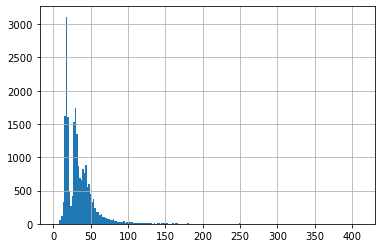

In [ ]:

data.living_area.hist(bins=200)

we see a high value of 409, but the area can be very large, so we will not consider this an outlier. But the minimum value of 2m can be considered an outlier, let's see how many there are.

In [ ]:
less_than2 = data[data['living_area'] < 2].count()
less_than2
#таких площадей нет

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

I looked at other parameters in this category of apartments with living_area < 9 and in these apartments there is a kitchen_area larger than living_area, so before getting rid of these values, we will determine the number of apartments with a kitchen area below the minimum

In [ ]:
data.kitchen_area.value_counts()
data.kitchen_area.min()

1.3

according to information on the Internet, the minimum kitchen area should be from 5 m2. Let's find how many apartments do not meet this minimum

In [ ]:
a = data[data['kitchen_area'] < 5]
a.count()


total_images            105
last_price              105
total_area              105
first_day_exposition    105
rooms                   105
ceiling_height           68
floors_total            105
living_area             104
floor                   105
is_apartment            105
studio                  105
open_plan               105
kitchen_area            105
balcony                 105
locality_name           105
airports_nearest         69
cityCenters_nearest      69
parks_around3000         20
parks_nearest            20
ponds_around3000        105
ponds_nearest           105
days_exposition          91
dtype: int64

remove the values in which the area is less than the minimum for living_area and kitchen_area together

In [ ]:
data[(data['living_area']<9)&(data['kitchen_area']<5)].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

there are no such values, so we will not remove the minimum values, especially since total_area, that is, the total area corresponds to the minimum value - 10, according to the requirements for the apartment (search on the Internet)

In [ ]:
data_check = data.loc[(data.kitchen_area + data.living_area)>data.total_area]
data_check = data_check[['kitchen_area', 'living_area', 'total_area', 'locality_name', 'studio']]
data_check.head(15)


,kitchen_area,living_area,total_area,locality_name,studio
184,6.20,26.10,30.20,Санкт-Петербург,False
545,5.00,20.00,23.80,Санкт-Петербург,False
551,9.28,30.55,31.59,посёлок Мурино,False
601,7.00,48.30,53.70,Санкт-Петербург,False
696,23.43,23.43,34.69,Санкт-Петербург,False
1060,20.50,39.00,50.00,Санкт-Петербург,False
1155,12.00,33.00,38.00,Санкт-Петербург,False
1354,19.00,38.00,54.50,Санкт-Петербург,False
1407,18.20,18.00,24.60,Санкт-Петербург,False
1854,14.84,55.00,60.20,Санкт-Петербург,False


we checked in which cases the sum of living_area and kitchen_area exceeds the total area, it turned out to be 64 rows, this should not be so. I checked what other common features these apartments have in order to identify dependence. For example - whether they all belong to the category of studios or apartments, but apart from the common name of the city, there is no connection between them. From which I conclude that the person who measured the room in St. Petersburg is mistaken in the measurements.
    
We need data to identify the dependency, so we will replace all the total_area values ​​​​in these apartments with the actual sum of the values ​​\u200b\u200bof the two columns kitchen_area and living_area

In [ ]:
sum_of = data.kitchen_area + data.living_area
data.loc[sum_of>data.total_area, 'total_area'] = sum_of
data.loc[(data.kitchen_area + data.living_area)>data.total_area].count()


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [ ]:
data.total_area.sort_values()

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23699, dtype: float64

In [ ]:
#двигаемся дальше
data.total_area.min()

12.0

In [ ]:
data.floors_total.value_counts()
data.floors_total.max()

60

yes, there are incredibly high values - 60, but at the same time there is an intermediate value of 52, which means that 60 will not be considered an outlier. An additional search on the Internet confirmed that such a number of storeys of buildings in Moscow and St. Petersburg are possible.

In [ ]:
data.days_exposition.value_counts()
data.days_exposition.max()/365

4.328767123287672

проверим написание населенных пунктов

In [ ]:
data.locality_name.value_counts()
names = data.locality_name.unique()
data.locality_name.value_counts()


Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data.locality_name.value_counts()

Санкт-Петербург                     15721
поселок Мурино                        556
поселок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: locality_name, Length: 330, dtype: int64

## Calculations and adding results to the table

There are several tasks in this step - to determine:
1. price per square meter - price_per_meter;
2. day of the week, month and year of publication of the announcement - day, month, year;
3. floor of the apartment: options - first, last, other - categorization of the floor column;
4. the ratio of residential and total area, as well as
5. ratio of kitchen area to total - total_area/living_area, total_area/kitchen_area.

1. price_per_meter;

In [ ]:
data['price_per_meter'] = (data['last_price']/data['total_area']).astype(int)
data['price_per_meter'].head(10)
price_table = pd.DataFrame(data=data, columns=['price_per_meter', 'last_price', 'total_area'])
price_table.head(10)

,price_per_meter,last_price,total_area
0,120370,13000000.0,108.00
1,82920,3350000.0,40.40
2,92785,5196000.0,56.00
3,408176,64900000.0,159.00
4,100000,10000000.0,100.00
5,95065,2890000.0,30.40
6,99195,3700000.0,37.30
7,110544,7915000.0,71.60
8,87454,2900000.0,33.16
9,88524,5400000.0,61.00


2. day, month, year;

In [ ]:
#data['test'] = data['first_day_exposition'].astype('datetime64[M]')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,NaN,NaN,0,0.0,81.0,82920
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1,48.0,121.0,100000


In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [ ]:
#найдем день, месяц и год публикации объявления и поместим значения в отдельные колонки
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [ ]:
#data['test'] = data['first_day_exposition'].astype('datetime64[M]')

In [ ]:
# для получения дня недели из даты
data['day'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month,year,day
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2,755.0,NaN,120370,3,2019,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,NaN,NaN,0,0.0,81.0,82920,12,2018,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2,574.0,558.0,92785,8,2015,3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6800.0,2.0,84.0,3,234.0,424.0,408176,7,2015,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1,48.0,121.0,100000,6,2018,1


In [ ]:
def week_map (day):
    if day == 0:
        return 'понедельник'
    if day == 1:
        return 'вторник'
    if day == 2:
        return 'среда'
    if day == 3:
        return 'четверг'
    if day == 4:
        return 'пятница'
    if day == 5:
        return 'суббота'
    return 'воскресенье'
week_map(3)
data['day'] = data['day'].apply(week_map)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month,year,day
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2,755.0,NaN,120370,3,2019,четверг
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,NaN,NaN,0,0.0,81.0,82920,12,2018,вторник
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2,574.0,558.0,92785,8,2015,четверг
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6800.0,2.0,84.0,3,234.0,424.0,408176,7,2015,пятница
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1,48.0,121.0,100000,6,2018,вторник


3. floor of the apartment: options - first, last, other - categorization of the floor column;

In [ ]:
data['cityCenters_nearest'].sort_values(ascending=False)

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

In [ ]:
#этаж квартиры: варианты — первый, последний, другой - категоризация колонки floor; 
def floor_category_func (floor):
    total = floor['floors_total']
    fl = floor['floor']
    if fl == 1:
        return 'первый'
    if fl == total:
        return 'последний'
    return 'другой'
floor_values = [24,1]
floor_columns = ['total_floors','floor']
floor = pd.Series(data=floor_values, index=floor_columns)
data['floor_category'] = data.apply(floor_category_func, axis=1)
data.head()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month,year,day,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2,755.0,NaN,120370,3,2019,четверг,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,NaN,0,0.0,81.0,82920,12,2018,вторник,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1.0,90.0,2,574.0,558.0,92785,8,2015,четверг,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,2.0,84.0,3,234.0,424.0,408176,7,2015,пятница,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1,48.0,121.0,100000,6,2018,вторник,другой


round the initial data and the obtained values
ratio_area column displays the ratio of residential and total area
ratio_area_kitchen column displays the ratio of the kitchen area to the total

In [ ]:
data['total_area'] = round(data['total_area'],2)
data['living_area'] = round(data['living_area'],2)
data['ratio_area'] = data['living_area']/data['total_area']
data['ratio_area_kitchen'] = data['kitchen_area']/data['total_area']
data['ratio_area'] = round(data['ratio_area'],2)
data['ratio_area_kitchen'] = round(data['ratio_area_kitchen'],2)
#проверяем
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month,year,day,floor_category,ratio_area,ratio_area_kitchen
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,120370,3,2019,четверг,другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,0.0,81.0,82920,12,2018,вторник,первый,0.46,0.27
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574.0,558.0,92785,8,2015,четверг,другой,0.61,0.15
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424.0,408176,7,2015,пятница,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,100000,6,2018,вторник,другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,0.0,55.0,95065,9,2018,понедельник,другой,0.47,0.30
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,0.0,155.0,99195,11,2017,четверг,другой,0.28,0.39
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0,0.0,NaN,110544,4,2019,четверг,другой,NaN,0.26
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,0.0,189.0,87454,5,2018,среда,другой,0.47,0.27
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,0.0,289.0,88524,2,2017,воскресенье,другой,0.71,0.11


## Exploratory data analysis

Explore the following parameters: area, price, number of rooms, ceiling height. Plot histograms for each parameter.

COST HISTOGRAM

4650000.0

763000000.0

12190.0

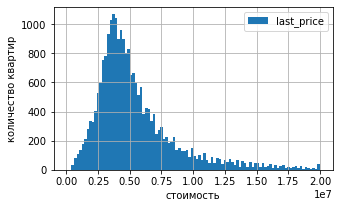

In [ ]:
price_hist = data.plot(y='last_price',kind='hist', bins=100, grid=True, range=(0,20000000), figsize=(5,3))
price_hist.set_xlabel('стоимость')
price_hist.set_ylabel('количество квартир')
display(data['last_price'].median())


display(data['last_price'].max())
data['last_price'].min()


having received a histogram, we can say that the data distribution is normal, there are outliers, but insignificant

HISTOGRAM OF THE TOTAL AREA OF THE APARTMENT

52.0

900.0

12.0

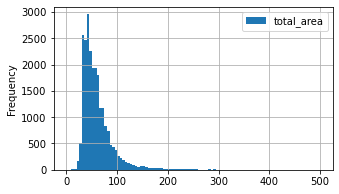

In [ ]:
data.plot(y='total_area', bins=100, grid=True, kind='hist', range=(0,500), figsize=(5,3))
display(data['total_area'].median())
display(data['total_area'].max())
data['total_area'].min()


he distribution of values in the histogram looks normal. There are outliers - the maximum value is 900, but we had to reduce the histogram box to 500 to see the distribution. We can say that the average area of ​​an apartment is 52 meters on the median

HISTOGRAM OF NUMBER OF ROOMS

19

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

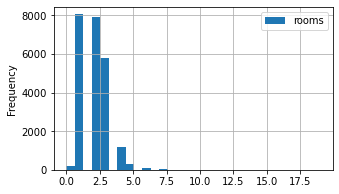

In [ ]:
data.plot(y='rooms', kind='hist', range=(0,19), bins=30, grid=True, figsize =(5,3))
display(data['rooms'].max())
data['rooms'].min()
data['rooms'].value_counts()


the values look normal, there are apartments with a different number of rooms. You might think that 19 apartments is an outlier, but this also happens (plus there are intermediate values ​​- 15). There are two peaks, 1- and 2-room apartments

CEILING HEIGHT HISTOGRAM

100.0

1.0

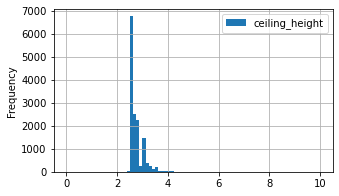

In [ ]:
data.plot(y='ceiling_height', kind='hist', range=(0,10), grid=True, figsize=(5,3), bins=80)
display(data['ceiling_height'].max())
data['ceiling_height'].min()




the ceiling height column has unrealistic values of 100 meters, these are outliers, let's look at them in more detail

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

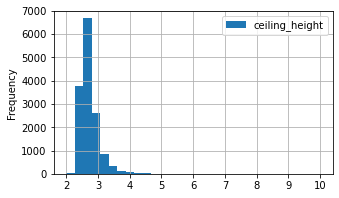

In [ ]:
data.plot(y='ceiling_height', kind='hist', range=(2,10), grid=True, figsize=(5,3), bins=30)
data['ceiling_height'].value_counts()

discard values up to 2.5 and above 4.5 meters (according to the recommendations of Sanpin, the ceiling should be above 2.7 meters, but the values ​​from 2.5 to 2.7 are too many, so we cannot get rid of them)

In [ ]:
med = data['ceiling_height'].median()
rows = (data['ceiling_height'] <= 2.5) & (data['ceiling_height'] >= 4.5)
data.loc[rows,'ceiling_height'] = 2.65
data['ceiling_height'] = data['ceiling_height'].fillna(med)



2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

100.0

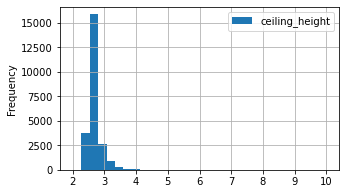

In [ ]:
data.plot(y='ceiling_height', kind='hist', range=(2,10), grid=True, figsize=(5,3), bins=30)
display(data['ceiling_height'].value_counts())
data['ceiling_height'].min()
data['ceiling_height'].max()

HISTOGRAM APARTMENT SALE TIME

1580.0

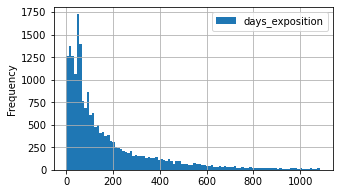

In [ ]:
data.plot(y='days_exposition', kind='hist', range=(0,1085), grid=True, figsize=(5,3), bins=100)
data['days_exposition'].max()

<AxesSubplot:ylabel='Frequency'>

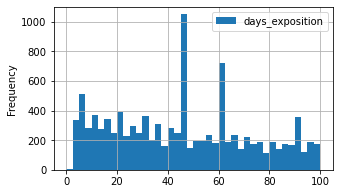

In [ ]:
data.plot(y='days_exposition', kind='hist', range=(0,100), grid=True, figsize=(5,3), bins=40)


In [ ]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [ ]:
display(data['days_exposition'].median())
data['days_exposition'].mean()


95.0

180.88863436982163

(1.0, 1000.0)

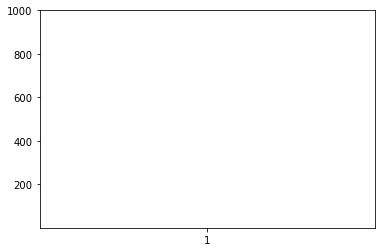

In [ ]:
plt.boxplot(data['days_exposition'])
plt.ylim(1,1000)


Remove rare and outlier values

In [ ]:
#избавимся от выбивающихся значений: 0, 7, 30, 45, 60, 90
clean_data  = data.query('days_exposition<1000 and days_exposition!=0 and days_exposition!=7 and days_exposition!=30 and days_exposition!=45 and days_exposition!=60 and days_exposition!=90')


102.0

173.75872274143302

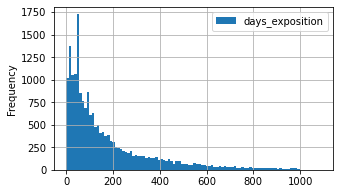

In [ ]:
clean_data.plot(y='days_exposition', kind='hist', range=(0,1085), grid=True, figsize=(5,3), bins=100)
display(clean_data['days_exposition'].median())
clean_data['days_exposition'].mean()


(1.0, 1000.0)

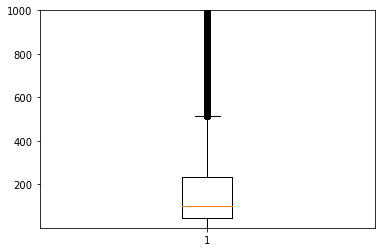

In [ ]:
plt.boxplot(clean_data['days_exposition'])
plt.ylim(1,1000)

After we removed the outliers, the histogram looks more smooth, and the average value is close to the medina. We can say that:
1. the average number of days the sale of an apartment is about 180
2. Most of the apartments are sold earlier and values ​​longer than a year are rare.
3. It is also possible to sell the apartment for longer than 2 years.
4. According to the swing diagram, the "too long" sale category includes terms above 550 days, but not too fast, as most apartments are sold quickly.
(it would be interesting to mark the days that we removed: 7, 30, 45, 60 and check the dependence of the number of sales on these days, perhaps it is weekends, holidays, or on the page for finding apartments there is a pattern for updating ads every 15 days)

DEPENDENCE OF THE COST OF THE APARTMENT ON THE TOTAL AREA

In [ ]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'month', 'year',
       'day', 'floor_category', 'ratio_area', 'ratio_area_kitchen'],
      dtype='object')

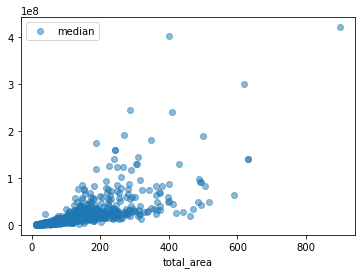

In [ ]:
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc=['mean','median','count'])
pivot_total_area.columns = ['mean','median','count']
pivot_total_area = pivot_total_area.plot(y='median', style='o', alpha=0.5)

#data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4)

In [ ]:
data['total_area'].corr(data['last_price'])

0.6536660613444514

We calculated the Pearson correlation coefficient - 0.6. This suggests that there is a relationship between the two values, and it is high. It can be said that:
1. the larger the area of ​​the apartment, the higher its cost
2. obviously, the cost is influenced by many other parameters besides the area

DEPENDENCE OF THE PRICE OF AN APARTMENT ON THE NUMBER OF ROOMS

0.36334284996489574

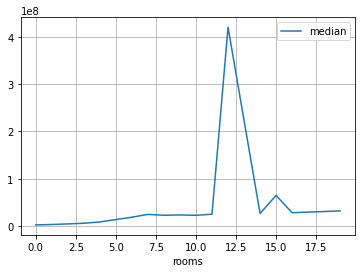

In [ ]:
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median','count'])
pivot_rooms.columns = ['mean','median','count']
#pivot_rooms.query('count>10').plot(grid=True,y='median')
pivot_rooms.plot(grid=True,y='median')
data['rooms'].corr(data['last_price'])


In [ ]:
data.loc[(data.rooms>11)&(data.rooms<14)]
#мы нашли одну из самых дорогих квартир, предлагаю удалить ее для чистоты данных и рассмотреть зависимость стоимости без нее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month,year,day,floor_category,ratio_area,ratio_area_kitchen
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,2,318.0,106.0,466666,12,2017,среда,последний,0.46,0.12


In [ ]:
pivot_rooms = data.loc[data.last_price < 420000000.0]


<AxesSubplot:xlabel='rooms'>

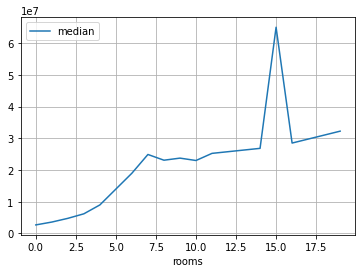

In [ ]:

pivot_rooms = pivot_rooms.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median','count'])
pivot_rooms.columns = ['mean','median','count']

#pivot_rooms.query('count>10').plot(grid=True,y='median')
pivot_rooms.plot(grid=True,y='median')

In [ ]:
#посмотрим много ли квартир с комнатами больше 12
data[data.rooms>12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month,year,day,floor_category,ratio_area,ratio_area_kitchen
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,2,435.0,418.0,68870,12,2017,суббота,другой,0.61,0.05
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,0.0,14.0,110169,2,2019,четверг,другой,0.69,0.17
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5,264.5,2,False,...,2,548.0,114.0,86091,6,2018,суббота,другой,0.71,0.07
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,0,0.0,1365.0,105555,3,2015,понедельник,последний,0.67,0.05
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4,168.3,2,False,...,2,118.0,95.0,116784,3,2016,четверг,другой,0.69,0.11


there is a relationship between the cost of an apartment and the number of rooms, and it is insignificant 0.36. The following conclusions can be drawn:
1. The more rooms in the apartment, the higher the cost of the apartment.
2. The most expensive segment in apartments from 12-15 rooms (but there are not many of them at all, more data on apartments with more than 12 rooms is needed to claim that they are much more expensive than others). They are indeed more expensive, but within a correlation of 0.3

DEPENDENCE OF THE PRICE OF AN APARTMENT ON THE DISTANCE FROM THE CENTER

In [ ]:
data['cityCenters_nearest'].sort_values()

13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
         ...  
23683      NaN
23692      NaN
23695      NaN
23696      NaN
23698      NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

-0.20674734874298376

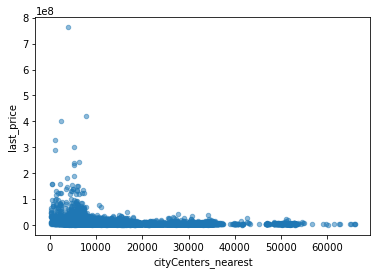

In [ ]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.5)
data['last_price'].corr(data['cityCenters_nearest'])

ANSWER: We see an inverse correlation - 0.2. Indeed, the less km from the center, the higher the cost of the apartment. But this dependence is not strong.

DEPENDENCE OF THE PRICE OF THE APARTMENT ON THE FLOOR NUMBER

median                                mean                \
floor_category     другой     первый  последний        другой        первый   
last_price      4850000.0  3900000.0  4350000.0  6.674074e+06  4.803560e+06   

                              
floor_category     последний  
last_price      7.351339e+06

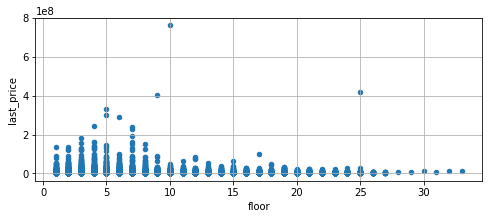

In [ ]:
data.plot(x='floor', y='last_price', grid=True, kind='scatter', figsize=(8,3))
table = data.pivot_table(columns='floor_category', values='last_price', aggfunc=['median','mean'])
table.head(10)

In [ ]:
data['last_price'].corr(data['floor'])

0.026575643284470808

According to the histogram, we see that the lower the floor, the higher the cost of the apartment and the higher the floor, the lower the cost of the apartment. It can also be said that the higher the floor of the apartment, the more predictable the cost per square meter and the "emissions" are greater in the category of apartments on the lower floors.
According to the pivot table and Pearson's coefficient, we see that the dependence is insignificant.

DEPENDENCE OF THE PRICE OF THE APARTMENT ON THE DATE OF PLACEMENT

day
воскресенье    1699
суббота        1936
понедельник    3612
среда          3974
пятница        4000
вторник        4183
четверг        4295
Name: last_price, dtype: int64

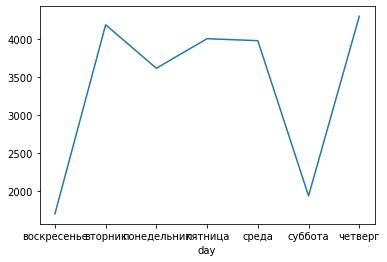

In [ ]:
table = data.groupby('day')['last_price'].count()
table.plot(y='median')
table.sort_values()

according to the chart and the table, the lowest apartment price is on weekends, and the highest price is on Thursday. In general, we can say that on weekdays the cost is higher, perhaps this is due to the fact that sales are made on weekdays, and less often on weekends (realtor, lawyer do not work)

,last_price
month,
5,1274
1,1500
12,1641
7,1695
8,1744
6,1760
9,1981
10,2127
11,2371


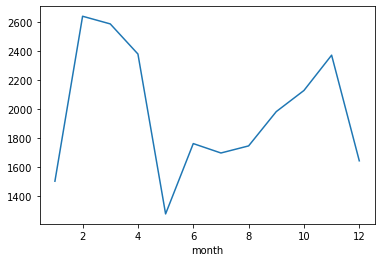

In [ ]:
table = data.groupby('month')['last_price'].count()
table.plot(y='median')
table.sort_values().to_frame()

The highest cost in the period February-March-April, and the lowest cost in December-January and May. I attribute this to the fact that in December it is better to complete open transactions with real estate and you can receive promotional and discounted New Year's offers, in January the cost is lower, for the same reason as on weekends. Few people work. and in May, respectively - a lot of holidays

In [ ]:
#построить корреляцию матрицей для нужных параметров
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653666,0.363343,-0.206747
total_area,0.653666,1.000000,0.758226,-0.231463
rooms,0.363343,0.758226,1.000000,-0.184864
cityCenters_nearest,-0.206747,-0.231463,-0.184864,1.000000


Select the 10 locations with the most ads. Calculate the average price per square meter in these settlements. Select among them the settlements with the highest and lowest cost of housing. This data can be found by name in the column locality_name

In [ ]:
local_pivot = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','median','mean'])


In [ ]:
local_pivot = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','median','mean'])
local_pivot.columns = ['count', 'median', 'mean']
table = local_pivot.sort_values('count', ascending=False).head(10)
table

,count,median,mean
locality_name,,,
Санкт-Петербург,15721,104729.0,114811.859933
поселок Мурино,556,85697.0,85575.762590
поселок Шушары,440,76747.5,78659.181818
Всеволожск,398,65789.0,68580.520101
Пушкин,369,100000.0,103125.373984
Колпино,338,74723.5,75404.733728
поселок Парголово,327,91516.0,90111.923547
Гатчина,307,67695.0,68666.609121
деревня Кудрово,299,91860.0,92473.086957


array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'median'}>],
       [<AxesSubplot:title={'center':'mean'}>, <AxesSubplot:>]],
      dtype=object)

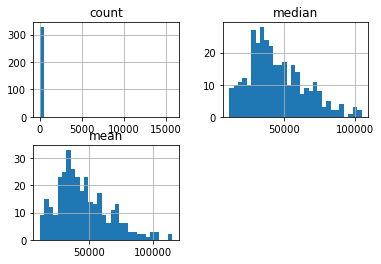

In [ ]:
local_pivot.hist(bins=30)


CONCLUSION - The highest cost of housing in such cities: St. Petersburg, the village of Murino, the village of Shushary, Vsevolozhsk, Pushkin, Kolpino, the village of Pargolovo, Gatchina, the village of Kudrovo, Vyborg

In [ ]:
display(table[table['mean']==table['mean'].max()])
table[table['mean']==table['mean'].min()]

,count,median,mean
locality_name,,,
Санкт-Петербург,15721,104729.0,114811.859933


,count,median,mean
locality_name,,,
Выборг,237,58158.0,58141.489451


In [ ]:
table = data.groupby('locality_name')['cityCenters_nearest'].count()
table.sort_values(ascending=False)

locality_name
Санкт-Петербург            15660
поселок Шушары               436
Пушкин                       368
Колпино                      337
поселок Парголово            327
                           ...  
деревня Новое Девяткино        0
деревня Низино                 0
деревня Нижняя                 0
деревня Нижние Осельки         0
село Шум                       0
Name: cityCenters_nearest, Length: 330, dtype: int64

In [ ]:
table = data.query('locality_name=="Санкт-Петербург"')
table['cityCenters_nearest']

0        16028.0
2        13933.0
3         6800.0
4         8098.0
7        11634.0
          ...   
23689    16081.0
23690     6263.0
23691     4489.0
23694     4232.0
23697    10364.0
Name: cityCenters_nearest, Length: 15721, dtype: float64

,price_per_meter
cityCenters_nearest_km,
0,187323.674419
1,166539.208333
2,146662.420195
3,129361.414449
4,137475.039691
5,146947.977893
6,152277.455319
7,141376.373464
8,120533.256716


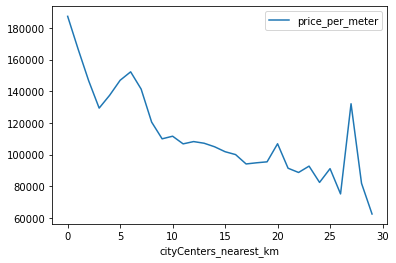

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(int)
table = data.query('cityCenters_nearest_km != 999999 and locality_name == "Санкт-Петербург"')
table = table.pivot_table(index='cityCenters_nearest_km', values='price_per_meter')
table.plot()
table.head(15)

In [ ]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'month', 'year',
       'day', 'floor_category', 'ratio_area', 'ratio_area_kitchen',
       'cityCenters_nearest_km'],
      dtype='object')

In [ ]:
second_spb_data = spb_data.pivot_table(index='price_per_meter', values=['rooms','cityCenters_nearest','floor','month'], aggfunc=('corr'))
#pd.plotting.scatter_matrix(second_spb_data, figsize=(9,9))
second_spb_data.head(15)


cityCenters_nearest     floor     month  \
price_per_meter                                                                
87990           cityCenters_nearest             1.000000       NaN       NaN   
93750           rooms                           1.000000  1.000000 -1.000000   
                cityCenters_nearest             1.000000  1.000000 -1.000000   
                floor                           1.000000  1.000000 -1.000000   
                month                          -1.000000 -1.000000  1.000000   
95000           rooms                           0.732990  1.000000 -0.827379   
                cityCenters_nearest             1.000000  0.732990 -0.420394   
                floor                           0.732990  1.000000 -0.827379   
                month                          -0.420394 -0.827379  1.000000   
100000          rooms                           0.897556  0.816497 -0.592610   
                cityCenters_nearest             1.000000  0.751317 -0.848511   
                floor                           0.751317  1.000000 -0.303822   
                month                          -0.848511 -0.303822  1.000000   
102500          rooms                          -1.000000  1.000000  1.000000   
                cityCenters_nearest             1.000000 -1.000000 -1.000000   

                                        rooms  
price_per_meter                                
87990           cityCenters_nearest       NaN  
93750           rooms                1.000000  
                cityCenters_nearest  1.000000  
                floor                1.000000  
                month               -1.000000  
95000           rooms                1.000000  
                cityCenters_nearest  0.732990  
                floor                1.000000  
                month               -0.827379  
100000          rooms                1.000000  
                cityCenters_nearest  0.897556  
                floor                0.816497  
                month               -0.592610  
102500          rooms                1.000000  
                cityCenters_nearest -1.000000

In [ ]:
#для того, чтобы сравнить корреляции между собой, создадим новую таблицу
my_new_data = data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'cityCenters_nearest']]
my_new_data

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest
0,108.00,13000000.0,3,2.70,16028.0
1,40.40,3350000.0,1,2.65,18603.0
2,56.00,5196000.0,2,2.65,13933.0
3,159.00,64900000.0,3,2.65,6800.0
4,100.00,10000000.0,2,3.03,8098.0
...,...,...,...,...,...
23694,133.81,9700000.0,3,3.70,4232.0
23695,59.00,3100000.0,3,2.65,NaN
23696,56.70,2500000.0,2,2.65,NaN
23697,76.75,11475000.0,2,3.00,10364.0


In [ ]:
#заполним недостающие значения медианным значением
my_new_data.ceiling_height = my_new_data.ceiling_height.fillna(my_new_data.ceiling_height.median())
my_new_data.cityCenters_nearest = my_new_data.cityCenters_nearest.fillna(my_new_data.cityCenters_nearest.median())

/private/var/mobile/Containers/Data/Application/8FF940A7-580F-427E-970E-677920F0E7CB/tmp/ipykernel_4972/333355209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_new_data.ceiling_height = my_new_data.ceiling_height.fillna(my_new_data.ceiling_height.median())
/private/var/mobile/Containers/Data/Application/8FF940A7-580F-427E-970E-677920F0E7CB/tmp/ipykernel_4972/333355209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_new_data.cityCenters_nearest = my_new_data.cityCenters_nearest.fillna(my_new_

In [ ]:
my_new_data.cityCenters_nearest.median()

13098.5

<AxesSubplot:>

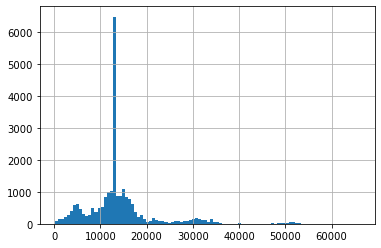

In [ ]:
my_new_data.cityCenters_nearest.hist(bins = 100)

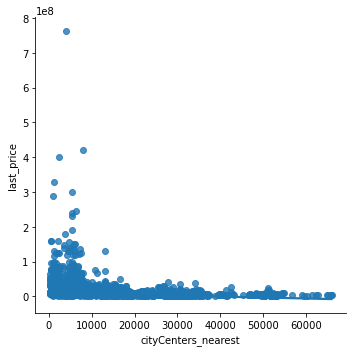

In [ ]:
sns.lmplot(data=my_new_data, x="cityCenters_nearest", y="last_price")

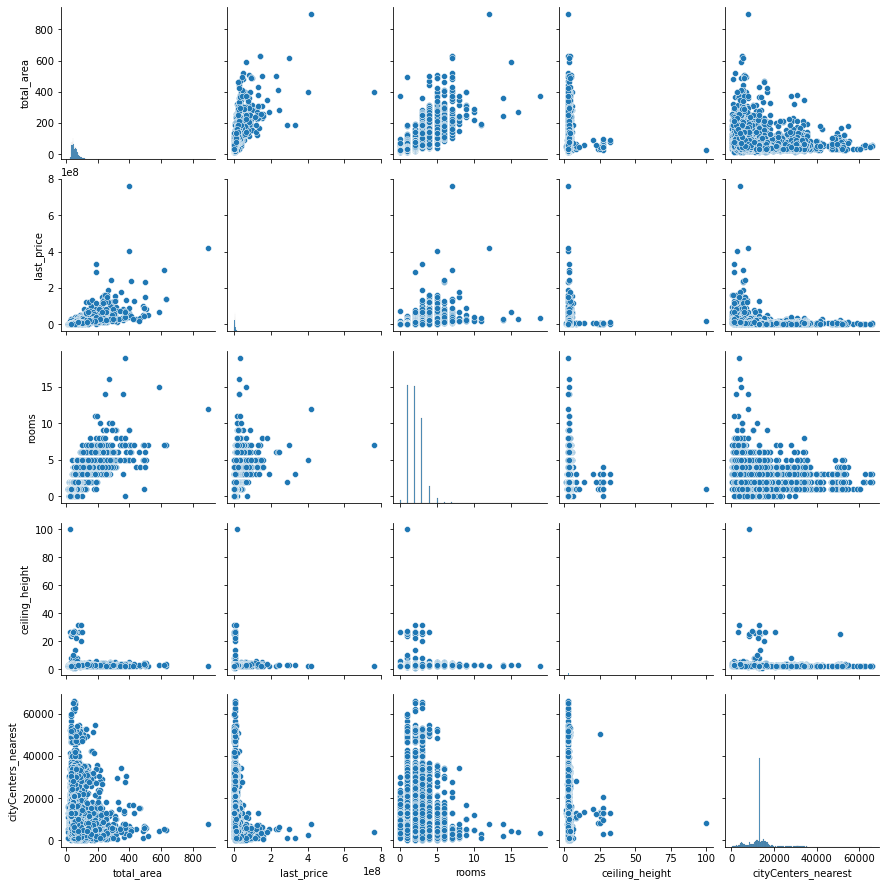

In [ ]:
sns.pairplot(my_new_data)

In [ ]:
#рассмотрим влияние параметров на ценообразование, в районе 5000м от центра
c_new_data_5000 = my_new_data.loc[data.cityCenters_nearest < 5000]
c_new_data_5000.corr()
c_new_data_5000.head(10)

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest
24,97.2,6500000.0,2,2.65,2336.0
35,149.0,15500000.0,5,2.65,3502.0
61,74.0,7990000.0,2,2.65,4288.0
63,118.0,20000000.0,3,3.00,4800.0
99,90.0,9600000.0,4,2.65,2818.0
121,180.0,33000000.0,3,2.90,4264.0
136,51.8,6500000.0,2,3.45,3618.0
137,85.1,13310800.0,2,2.70,4263.0
138,40.0,4800000.0,2,2.65,2913.0
147,179.6,27700000.0,5,2.85,4489.0


In [ ]:
#рассмотрим влияние параметров на ценообразование, в районе 2000м от центра
c_new_data_2000 = my_new_data.loc[data.cityCenters_nearest < 2000]
c_new_data_2000.corr()
c_new_data_2000.head(10)

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest
155,317.0,96000000.0,4,3.50,1771.0
207,72.6,9000000.0,2,2.90,1645.0
213,111.4,8700000.0,4,3.10,1218.0
282,115.0,37000000.0,2,2.65,1995.0
433,57.8,6800000.0,3,2.80,1166.0
450,53.0,6550000.0,2,3.50,1429.0
492,216.0,95000000.0,4,3.00,436.0
502,71.0,11250000.0,2,2.65,1217.0
555,83.1,7680000.0,3,2.65,1803.0
581,365.0,65000000.0,7,2.90,1690.0


In [ ]:
c_data = my_new_data.corr()

In [ ]:
#общая корреляция
arr_data = c_data['last_price'].abs().sort_values(ascending=False)[1:15]
arr_data = pd.DataFrame(arr_data)
arr_data = arr_data.rename(columns={'last_price':'all_data'})
arr_data

,all_data
total_area,0.653666
rooms,0.363343
cityCenters_nearest,0.191029
ceiling_height,0.064425


In [ ]:
#корреляция влияния на ценообразование в пределах 5000м
arr_data_5000 = pd.DataFrame(c_new_data_5000.corr()['last_price'].abs().sort_values(ascending=False)[1:15])
arr_data_5000 = arr_data_5000.rename(columns={'last_price':'5000_price'})
arr_data_5000

,5000_price
total_area,0.552189
rooms,0.268629
cityCenters_nearest,0.084136
ceiling_height,0.033835


In [ ]:
#корреляция влияния на ценообразование в пределах 2000м
arr_data_2000 = pd.DataFrame(c_new_data_2000.corr()['last_price'].abs().sort_values(ascending=False)[1:15])
arr_data_2000 = arr_data_2000.rename(columns={'last_price':'2000_price'})

In [ ]:
arr_data_2000

,2000_price
total_area,0.528579
rooms,0.219491
cityCenters_nearest,0.140782
ceiling_height,0.109174


In [ ]:
#сравненипе как меняются параметры в зависимости от удаленности
arr_data = arr_data.merge(arr_data_5000, left_index=True, right_index=True)
arr_data = arr_data.merge(arr_data_2000, left_index=True, right_index=True)

In [ ]:
arr_data

,all_data,5000_price,2000_price
total_area,0.653666,0.552189,0.528579
rooms,0.363343,0.268629,0.219491
cityCenters_nearest,0.191029,0.084136,0.140782
ceiling_height,0.064425,0.033835,0.109174


In [ ]:
#arr_data['index'] = arr_data.index

In [ ]:
arr_data = arr_data.reset_index()
arr_data

,index,all_data,5000_price,2000_price
0,total_area,0.653666,0.552189,0.528579
1,rooms,0.363343,0.268629,0.219491
2,cityCenters_nearest,0.191029,0.084136,0.140782
3,ceiling_height,0.064425,0.033835,0.109174


ANSWER: We see a table that shows the dependence of the main parameters and the cost of an apartment in two ranges - 2000 m and 5000 m. This allows us to look at the dynamics of changes in the influence of these parameters. We can draw the following conclusions:
1. Most of all, the price of an apartment depends on the area of ​​the apartment, and this parameter almost does not change, depending on the distance from the center
2. the price depends least of all on the height of the ceilings, and this parameter changes a lot closer to the center. That is, the closer the apartment is to the center, the more attention is paid to the height of the ceilings and the higher the cost with high ceilings.
3. there is a certain relationship between the number of rooms in an apartment and the cost of an apartment, and this parameter is quite stable at different distances from the center

CONCLUSION:
1. The highest cost of housing in St. Petersburg and the lowest cost of real estate in Vyborg
2. The most important parameter that affects the cost of an apartment is the area of ​​the apartment. (nevertheless, this dependence is not 100% and it is important to take into account other parameters
3. According to the study - the more rooms in the apartment, the more expensive it is
4. According to the study - the closer the apartment is to the center, the more expensive it is
5. According to a study, the more rooms an apartment has, the more expensive it is.
6. The cheapest apartments are sold in January-February and May on weekends - Saturday and Sunday

Advice to the technical team:
1. More accurately measure the area of ​​​​an apartment in St. Petersburg
2. if there is no balcony - indicate that it is not
3. Write day, month and year in different columns
4. Pay attention to unrealistic apartment data and check it upon receipt</div>